# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## EDA Final Project: Spotify Popularity Prediction

**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader and Chris Tanner

<hr style="height:2pt">



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels as sm
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [3]:
cid = '304f47a7973c446fa4cc490eaec6d061'
secret = 'f70927ac3cf14606b2aa54d4217ccf35'

client_credentials_manager = SpotifyClientCredentials(client_id = cid, client_secret = secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
artist_name, track_name, track_id, popularity = [], [], [], []

In [4]:
# gets the features for songs, output is a list
features_list = ['acousticness', 'danceability', 'duration_ms' 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
def get_features(song):
    big_lists = [[], [], [], [], [], [], [], [], [], [], [], []]
    count = 0
    for i in range(0, len(song), 50):
        song_track = song['track_id']
        audio_features = sp.audio_features(song_track[i : i + 50])
        count = count + 1
        for track in audio_features:
            for j in range(len(features_list)):
                big_lists[j].append(track[features_list[j]])
                print(count)
                
    return big_lists

In [5]:
# need to do year 2017 and 2018
# year:2019%20month:12%20day:5
artist_name, track_name, track_id, popularity = [], [], [], []
for i in range(0, 10000, 50):
    track_results = sp.search(q = 'year:2019', type = 'track', limit = 50, offset = i)
    audio_features = sp.audio_features(track_id[i : i + 50])
    for i, t in enumerate(track_results['tracks']['items']):
        print(t['artists'][0]['name'])
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

Post Malone
Travis Scott
Juice WRLD
Arizona Zervas
Billie Eilish
Selena Gomez
blackbear
DaBaby
Maroon 5
Lewis Capaldi
YNW Melly
The Weeknd
Lizzo
Lil Tecca
Dan + Shay
Tones and I
Billie Eilish
DaBaby
Post Malone
Drake
Dua Lipa
Post Malone
DaBaby
The Weeknd
Kanye West
Young Thug
Lil Baby
Harry Styles
Lil Mosey
Post Malone
YoungBoy Never Broke Again
Young Thug
SHAED
Sam Smith
Chris Brown
Juice WRLD
J. Cole
Post Malone
Halsey
Ellie Goulding
Lil Tjay
Polo G
Chance the Rapper
Bad Bunny
24kGoldn
Billie Eilish
Y2K
Young Thug
Selena Gomez
Shawn Mendes
Post Malone
21 Savage
Lizzo
Camila Cabello
Lil Tecca
Ariana Grande
Ant Saunders
Lil Tecca
Lil Nas X
Internet Money
Tyler, The Creator
Ed Sheeran
Post Malone
Roddy Ricch
Lil Nas X
Lil Uzi Vert
Marshmello
Bad Bunny
J Balvin
Khalid
Diplo
Taylor Swift
Ed Sheeran
Taylor Swift
Lil Nas X
YoungBoy Never Broke Again
Idina Menzel
Ariana Grande
Post Malone
Young Thug
NLE Choppa
Post Malone
Harry Styles
Quality Control
Bazzi
Taylor Swift
Lil Tecca
Niall Horan

Chase Rice
Juice WRLD
Ruel
Kevin Gates
Flo Milli
Lil Keed
Doja Cat
The Chainsmokers
Mulatto
Carin Leon
Michael Bublé
Michael Bublé
Rod Wave
Sia
Cuco
Dalex
FLETCHER
King Staccz
Ed Sheeran
iann dior
Bea Miller
iann dior
A R I Z O N A
J Balvin
Post Malone
Charlie Puth
Martin Jensen
Doja Cat
Alessia Cara
HAIM
Brooks & Dunn
blackbear
Kygo
OneRepublic
Melanie Martinez
Farruko
Bazzi
Alicia Keys
Kevin Gates
NF
Alan Walker
Lil Mosey
SuperM
Juice WRLD
A$AP Ferg
iann dior
Luis Fonsi
Flume
Filmore
Rex Orange County
Junior H
Manuel Turizo
Dean Lewis
Fat Joe
Lizzo
YoungBoy Never Broke Again
Avicii
The Chainsmokers
The Chainsmokers
Rick Ross
NF
Ruel
Gesaffelstein
Rex Orange County
Bryce Vine
Johnny Utah
5 Seconds of Summer
Brooks & Dunn
Young Dolph
Chris Janson
Luke Combs
French Montana
Lil Tecca
Shoreline Mafia
The Chainsmokers
Yo Gotti
Lil Dicky
Dimelo Flow
Bryant Myers
Kelly Clarkson
Zack Fox
Niall Horan
Future
Kevin Gates
Ariana Grande
Dalex
Taylor Swift
Oliver Tree
Dexys Midnight Runners
Lukas G

2 Chainz
Dalex
Fabolous
HAIM
Rex Orange County
Trippie Redd
Dove Cameron
ILLENIUM
Kacey Musgraves
Lil Peep
Calvin Harris
NF
YK Osiris
Daya
Conan Gray
Asking Alexandria
Global Dan
Tierra Whack
Smokepurpp
Maggie Rogers
Quando Rondo
Wisin & Yandel
Julia Michaels
Big Sean
Daddy Yankee
James TW
BROCKHAMPTON
Iggy Azalea
EVERGLOW
Granular
Marshmello
BTS
Bing Crosby
ITZY
Lewis Capaldi
Beyoncé
(G)I-DLE
Juice WRLD
Moon Laika
bbno$
Hobo Johnson
Lil Tecca
The Black Keys
Will Smith
Fuerza Regida
Lewis Capaldi
Bastille
Avicii
Manuel Turizo
Championxiii
Chance the Rapper
Clairo
Mau y Ricky
Machine Gun Kelly
Lil Mosey
Myke Towers
iann dior
Matt Maeson
Pola Ris
Hillsong UNITED
blink-182
NoCap
Blueface
Echo River
SiR
Lil Peep
Bastille
Gabby Barrett
Herencia de Patrones
Juice WRLD
Kevin Gates
Kevin Gates
Shoreline Mafia
Alex Couture
FLETCHER
Rod Wave
The Outdoor Library
The Lumineers
MC Kevin o Chris
Ed Sheeran
Los Hijos De Garcia
Freya Ridings
Upchurch
Christian Nodal
Arlette Leduc
Tyga
Waterparks
AJR
B

The Lumineers
Vince Staples
Ozuna
Lizzo
The Rolling Stones
Natanael Cano
Steven Universe
Seismic Shift
Chelsea Cutler
Llusion
Sarah Spring
Lil Peep
EXO
Alex Brightman
Plies
NLE Choppa
Luh Kel
Kehlani
The Ronettes
Pentatonix
Empty Space
DDG
Big Hookz
Xavier Wulf
Rod Wave
Tori Kelly
Jason Aldean
Bring Me The Horizon
Natti Natasha
Young Nudy
Bastille
BTS
Grimes
Macklemore
Why Don't We
YNW Melly
Pia Mia
Bastille
Carly Rae Jepsen
Alina Baraz
DJ Khaled
Alicia Keys
Steve Aoki
Ed Sheeran
Sueco the Child
Loote
HAIM
Lost Wings
K. Michelle
Maggie Rogers
Kiana Ledé
Roman Jensen
Ben Platt
Tejal Yann
Sure Sure
Bastille
Pentatonix
BROCKHAMPTON
Ariana Grande
JD McCrary
Bastille
Bastille
Bastille
Sava Sol
iann dior
iann dior
Moments of Clarity
Shordie Shordie
Lil Mosey
Offset
Fall Out Boy
Bastille
Bastille
Badflower
Alejandro Fernandez
Hozier
Bastille
Bastille
Bastille
Bastille
BigKlit
Junior H
Bastille
Madeon
Maxo Kream
Gunna
Kota the Friend
Lil Mosey
Ryan Hurd
Seeb
Jai Wolf
Lil Peep
2 Chainz
Witt Low

Joseph Beg
Tayla Parx
Sigala
Csizmazia Etel
CNCO
Lil Durk
Seismic Shift
DaBaby
Artemio Li Fonti
Tory Lanez
Flipp Dinero
Galantis
Lil Peep
Grupo 360
G Herbo
Noriel
Lauv
Cody Johnson
Rich The Kid
Jesse & Joy
Pentatonix
Dilaz
Travis Denning
Heike Blau
Wallows
Marca MP
88rising
Sufi Ellman
MAX
Papa Roach
Madeon
Back 2 Sleep
Hildur Guðnadóttir
Jason Aldean
9lokknine
Rich Music LTD
Hillsong UNITED
Jordan Clarke
Jacob David
Rucci
Back 2 Sleep
Ken Dorset
Drake
Florida Georgia Line
Boogie
MercyMe
Adventure Time
Luna Meguise
Gavin Haley
LoveLeo
Riley Green
Landon Cube
Lunay
Marca MP
Danny Ocean
Lost Frequencies
YK Osiris
Joy Williams
Sasha Sloan
Beyoncé
Gunna
Victoria Monét
Verzache
Hillsong Worship
Steven Universe
Antoine Minot
Zara Larsson
Guaynaa
Ingrid Andress
Pecos & the Rooftops
Summer Walker
Calma
Oliver Tree
Pathfinder
Ray Hutchcraft
EDEN
Kevin Gates
Skizzy Mars
Snoh Aalegra
Dave East
Jon Pardi
Sturgill Simpson
J.I the Prince of N.Y
Tyler Childers
Ferrugem
Ferrugem
Bryant Myers
Steven Un

HARDY
Mura Masa
Bruno Major
for KING & COUNTRY
Foo Fighters
Chance the Rapper
Ant Clemons
Fiona Elyse
Jason Derulo
Dan Bremnes
Dave East
$uicideBoy$
Pentatonix
John Legend
Khalid
Gucci Mane
Mahalia
Guapdad 4000
Foo Fighters
Jelly Roll
Jitka Kubr
Broods
Upchurch
Rico Nasty
La Arrolladora Banda El Limón De Rene Camacho
IDK
Foo Fighters
Killswitch Engage
Omotesando
Patrick Walker-Stiggs
TroyBoi
Stian Jarrell
Kygo
Dove Cameron
Miley Cyrus
Russ
Clairo
Casanova
Banda Carnaval
Key Glock
Rhett Walker
Zwera
King Von
Earl Sweatshirt
Sada Baby
Hardwell
Motionless In White
BLACKPINK
Florida Georgia Line
ROLE MODEL
G-Eazy
Dave East
Mereba
Gus Dapperton
FINNEAS
Grupo Firme
Katona Ernesztina
Kevin Gates
Brooks & Dunn
The Jackson 5
Dijon
Louis Brecker
Promoting Sounds
Río Roma
Miley Cyrus
Mandolin Orange
Slipknot
88rising
iBeFoolynn
Cole Swindell
Ashnikko
BROCKHAMPTON
Justnormal
Fuerza Regida
Minik Knudsen
Gryffin
Cavetown
Jasmine Ortiz
As I Lay Dying
BANKS
Aron Risa
Kota the Friend
24kGoldn
Moneybagg

Tinashe
Future
Steven Universe
Marca MP
Steven Universe
Steven Universe
Pop Smoke
Natanael Cano
Steven Universe
Steven Universe
Steven Universe
Steven Universe
Cody Simpson
Steven Universe
Steven Universe
Steven Universe
Steven Universe
Steven Universe
Steven Universe
Steven Universe
Steven Universe
Van Morrison
Steven Universe
Steven Universe
Steven Universe
gnash
Money Man
Steven Universe
Steven Universe
Maggie Rogers
Surfaces
Bon Iver
Pentatonix
WILLOW
Juice WRLD
HIXTAPE
Steven Universe
Steven Universe
Jack & Jack
Kidz Bop Kids
Tristan Eckerson
The Boyboy West Coast
Daya
Tosh Møller
Roy Woods
Duckwrth
Kane Brown
Piano Novel
blackbear
Sara Bareilles
Sia
Libor Kolman
Emotional Oranges
Ruel
Netsky
Lauren Daigle
SAINt JHN
Ruben
Dominique Charpentier
The Mayries
Abbie Lou Johnston
King Princess
The Belonging Co
X Ambassadors
Old Dominion
Rudimental
Death Cab for Cutie
Young Dolph
Cold War Kids
Young Nudy
Sebastian Yatra
The Black Keys
IU
Runaway June
Los Plebes del Rancho de Ariel Camach

YNW Bslime
SEVENTEEN
Los Angeles Azules
Yelawolf
Lizzo
Alex Rose
Clairo
Yxngxr1
Mike Bahía
Alejandro Sanz
Lewis Capaldi
Silvestre Dangond
KAROL G
Oliver Heldens
awfultune
lilbootycall
Alexander Cardinale
Aldous Harding
Foster The People
88rising
Ali Gatie
Jacquees
Koryn Hawthorne
Iggy Azalea
Milo Edale
Theory of a Deadman
Lil Durk
FKA twigs
Cavetown
Florence + The Machine
Blueface
須田景凪
Travis Greene
Maná
Romeo Santos
Juanes
Aleksy Wysocki
Jenni Rivera
Drake
Koe Wetzel
UMI
Wiz Khalifa
Middle School
Kara-Lis Coverdale
Whitney
AJR
Wisin
Of Monsters and Men
Ally Brooke
Charlotte Lawrence
Dave East
Hayden James
Fuerza Regida
Bryce Vine
Wallows
Danny Gokey
Ryan Hurd
Pentatonix
Ramin Djawadi
TAEMIN
bbno$
ASTRO
Cuco
Justin Rarri
Lindsey Stirling
Alaina Castillo
Free Nationals
Lil Loaded
Beta Radio
Spheres
Cory Marks
Loud Luxury
Vampire Weekend
Chris Lake
Big Wild
Don Omar
Cavetown
Lil Pump
Don Omar
KAIBA
SAINt JHN
Tommee Profitt
Rain Sounds FX
Jacquees
Don Omar
Fat Joe
Beck
mr_slace
Alex Brigh

NAV
DDG
Shannon Stuart
EARTHGANG
Tinashe
Wafia
Cuco
Musqitone
Duke Dumont
Lil Pump
Unspoken
Chris Brown
Lana Del Rey
Calibre 50
Vincent Sparro
Blac Youngsta
Cody Johnson
Wolfgang Amadeus Mozart
Hillsong Worship
Jon Egan
Wolfgang Amadeus Mozart
Elevation Worship
Wolfgang Amadeus Mozart
The Aural Healer
Jonas Blue
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozart
Michael Kiwanuka
Wolfgang Amadeus Mozart
Minnie Wester
Wolfgang Amadeus Mozart
Ben Platt
Wolfgang Amadeus Mozart
NAV
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozart
Yelawolf
Haley Reinhart
Wolfgang Amadeus Mozart
Rod Wave
Bells of Salzburg Cathedral
Massimo Natali [IT]
Wolfgang Amadeus Mozart
Temecula Road
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozart
Kota the Friend
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozart
Franz Xaver Wolfgang Mozart
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozart
Wolfgang Amadeus Mozar

Badflower
Thomas Sanders
Lil Weapon
Mark Ronson
Jai Paul
Flovry
Chris Brown
Rich Brian
Sada Baby
Highly Suspect
Koe Wetzel
Reykon
Jasiah
Alison Wonderland
Adventure Club
Blac Youngsta
Charli XCX
Julia Jacklin
Delly
Luh Kel
The Rudeboyz
I Prevail
Jimmy Eat World
Los Chavalos De La Perla
Shiro Sagisu
B5
Moby Rich
Pietra Costa
BONES
The Game
Cigarettes After Sex
Kevin Roldan
Beyoncé
Melii
Tessa Violet
Local Natives
Alyssa Stanfield
Teenage Priest
Yung Bae
The Piano Guys
Sasha Sloan
Tones and I
Beyoncé
Volbeat
Maluma
Waterparks
Lolo Zouaï
Rayne Johnson
Marshmello
Flovry
Drake
Hak Huyun Lee
LNM
D Smoke
Mary J. Blige
Mary J. Blige
LÉON
Dylan Sitts
Casey Donahew
Jon Pardi
YK Osiris
Mabel
Soccer Mommy
Becky G
Kane Brown
Mokita
Tinashe
Rauw Alejandro
Father
Milky Chance
Night Sounds
EXO-SC
BONES
Rich Music LTD
The Highwomen
Whiskey Myers
Flovry
Dave East
12dust
Quadeca
$uicideBoy$
Alonzo Gautier
Akhil
G-Eazy
La Energia Nortena
Fler
Dave East
Brantley Gilbert
Jaden
Sophia Anne Caruso
Casper Magi

Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
LUCKI
Ludwig van Beethoven
Ludwig van Beethoven
Ty James
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Austin Burke
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig

Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Be

Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Beethoven
Ludwig van Be

Major Lazer
Bryant Myers
Will Smith
Feid
Young Dolph
SAINt JHN
Kupla
Weather and Nature Recordings
hiyasu
Yandel
Yung Bans
Chase Atlantic
Brooks & Dunn
The Avett Brothers
Kehlani
TOOL
Jason Ross
Yoke Lore
Kelly Rowland
Gryffin
SAINt JHN
JPEGMAFIA
IDK
Cyrano Brussee
WHIPPED CREAM
Junior H
Wage War
Jorge Milliano
Little Big Town
The Black Keys
SwuM
Old Dominion
Action Bronson
Milky Chance
AJ Mitchell
De La Ghetto
Cody Simpson
Akon
HONNE
Vincent
Sam Barsh
Fona
Waterparks
Dinosaur Pile-Up
Amber Mark
Bryn Williams
NAV
Ambiworld
Timmy Trumpet
Ryan Griffin
Bassnectar
FINNEAS
Joywave
Hoody
Besomorph
John Ocean
Farid Bang
Marshmello
Dennis Lloyd
John Vincent III
Jasmine Ortiz
Smiley Stevens
83 Babies
Ludwig van Beethoven
Quality Control
Slaves
Kevin Garrett
Mother's Daughter
Blac Youngsta
Jack Harlow
Olivia O'Brien
Tyler Childers
Memphis May Fire
Boy In Space
Marshmello
RL Grime
Rodney Atkins
Phantogram
Stray Kids
Epi-Soothe
SYML
Beck
Lady Antebellum
Flughand
Marc E. Bassy
Juanes
Massimo Natali

Rich The Kid
Sum 41
Dimitri Vegas & Like Mike
Caroline Polachek
JayDaYoungan
Rob Thomas
Rittz
Throttle
GRiZ
Cooliecut
Quando Rondo
Citizen Way
Tasha Cobbs Leonard
Grupo Firme
Ryan Caraveo
Alive City
Grizfolk
Delaney Jane
Djo
Xavier Weeks
Ivory Wade
10k.Caash
Oatmello
Donna Vellema
Freddie Dredd
Linn Jones
WizKid
Of Mice & Men
ASTRO
Manzambi
PnB Rock
Rockie Fresh
Jimmy Durante
IU
Lucifer
El Chaval de la Bachata
Manuel Medrano
Dove Cameron
Chico Rose
Tedashii
STARSET
Ava Max
Phil Wickham
Lindsey Stirling
Vagabon
Offset
goosetaf
CLC
Action Bronson
Avicii
Moods
HEIZE
Greyson Chance
JPEGMAFIA
Caamp
Leslie Odom Jr.
Ollie
Feid
NGHTMRE
Future
Julia Jacklin
Van Sandano
Josh A
Esteban Gabriel
Joel Adams
Lil Poppa
Lee So Ra
William Edessa
Lizzo
DJ Khaled
Midland
Natanael Cano
Orville Peck
Shotgun Willy
YUNGBLUD
Young Nudy
Ingrid Andress
Ashnikko
Jon Pardi
Melii
Lilac
Jim Brickman
Fredo Bang
Chris Brown
Maren Morris
DAY6
Jay Som
Jordane Tumarinson
Woah Dude, That's Pretty Cool
$NOT
DJ Khaled
Rittz

Savage Ga$p
ChocQuibTown
Baby Keem
Chris Webby
Danko Debeljak
Upchurch
Gucci Mane
Left Boy
Tay-K
Kygo
eli.
Michel LeBond
Gareth Emery
Flux Pavilion
R.J. Smith
Kim Petras
Skizzy Mars
TAEYEON
Cage The Elephant
Kaja Voll
MOTi
Kehlani
Maren Morris
Hayden James
Sofia Reyes
Regard
Rich The Kid
Activa
Doja Cat
Labrinth
Carnage
Jay Wheeler
Masego
Myles Parrish
Melanie Faye
NEFFEX
Yungeen Ace
NAV
Roman Messer
M-22
BlackHawk
Nando Reis
Danielle Bradbery
Bonny Light Horseman
Lunay
Tom Walker
NoCap
Jobii
Bhad Bhabie
Henry Hume
Tory Lanez
Beck
Joeboy
Rita Ora
HIXTAPE
Paul Todnem
Karen O
Omniks
Tech N9ne
916frosty
Crush
Solis & Sean Truby
Natanael Cano
Ally Brooke
Casiio
BANKS
WWE
T3R Elemento
Waterparks
Ana Bárbara
KOKOROKO
Motionless In White
Kevin Abstract
AWOLNATION
Darren Tate
Hypaton
La Arrolladora Banda El Limón De Rene Camacho
Ajay Stephens
Travis Greene
Bishop Briggs
Julia Jacklin
Alistair
Monty Datta
Tory Lanez
Craig Connelly
Bring Me The Horizon
Calibre 50
Yelawolf
Call Me Karizma
G-LOC
I

In [6]:
acousticness, danceability, duration_ms, energy, instrumentalness = [], [], [], [], []
key, liveness, loudness, mode, speechiness = [], [], [], [], []
tempo, time_signature, valence = [], [], []

for i in range(0, len(track_id), 50):
    audio_features = sp.audio_features(track_id[i : i + 50])
    for track in audio_features:
        try:
            acousticness.append(track['acousticness'])
            danceability.append(track['danceability'])
            duration_ms.append(track['duration_ms'])
            energy.append(track['energy'])
            instrumentalness.append(track['instrumentalness'])
            key.append(track['key'])
            liveness.append(track['liveness'])
            loudness.append(track['loudness'])
            mode.append(track['mode'])
            speechiness.append(track['speechiness'])
            tempo.append(track['tempo'])
            time_signature.append(track['time_signature'])
            valence.append(track['valence'])
        except TypeError:
            acousticness.append(np.nan)
            danceability.append(np.nan)
            duration_ms.append(np.nan)
            energy.append(np.nan)
            instrumentalness.append(np.nan)
            key.append(np.nan)
            liveness.append(np.nan)
            loudness.append(np.nan)
            mode.append(np.nan)
            speechiness.append(np.nan)
            tempo.append(np.nan)
            time_signature.append(np.nan)
            valence.append(np.nan)
            

In [7]:
songs0 = pd.read_csv("data/songs2010.csv")
songs1 = pd.read_csv("data/songs2011.csv")
songs2 = pd.read_csv("data/songs2012.csv")
songs3 = pd.read_csv("data/songs2013.csv")
songs4 = pd.read_csv("data/songs2014.csv")
songs5 = pd.read_csv("data/songs2015.csv")
songs6 = pd.read_csv("data/songs2016.csv")
songs7 = pd.read_csv("data/songs2017.csv")
songs8 = pd.read_csv("data/songs2018.csv")
songs9 = pd.read_csv("data/songs2019.csv")

In [8]:
type(songs9)

pandas.core.frame.DataFrame

In [9]:
result = pd.concat([songs0, songs1, songs3, songs4, songs5, songs6, songs7, songs8, songs9])

In [10]:
result.to_csv("data/songs_all_decade.csv", index=False)

Text(0, 0.5, 'Frequency')

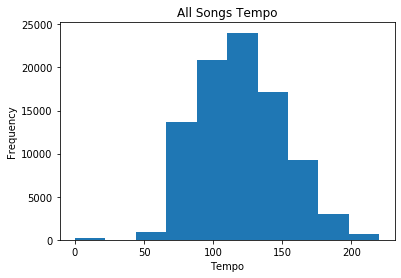

In [11]:
plt.hist(result['Tempo'])
plt.title('All Songs Tempo')
plt.xlabel('Tempo')
plt.ylabel('Frequency')

In [12]:
result = pd.read_csv("data/songs_all_decade.csv")

In [13]:
new_result = result[result['Tempo'] > 0]
new_result = new_result[new_result['Duration_ms'] < 600000]
new_result = new_result[new_result['Speechiness']< 0.66]

Text(0, 0.5, 'Frequency')

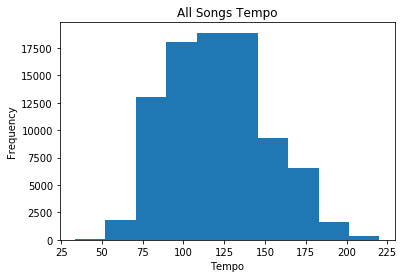

In [14]:
plt.hist(new_result['Tempo'])
plt.title('All Songs Tempo')
plt.xlabel('Tempo')
plt.ylabel('Frequency')
# tempo = 0, white noise example: Baby Sweet Dream Baby White Noise Series - Pure White Noise

Text(0, 0.5, 'Frequency')

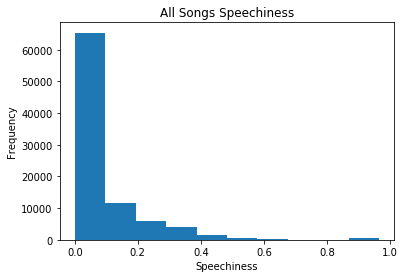

In [15]:
plt.hist(result['Speechiness'])
plt.title('All Songs Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')

In [16]:
features_list_cap = ['Acousticness', 'Danceability', 'Duration_ms', 'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Loudness', 'Mode', 'Speechiness', 'Tempo', 'Time Signature', 'Valence', 'Popularity']
def plot_hist(features):
    for f in features:
        plt.hist(new_result[f])
        plt.title('All Songs ' + f)
        plt.xlabel(f)
        plt.ylabel('Frequency')

14

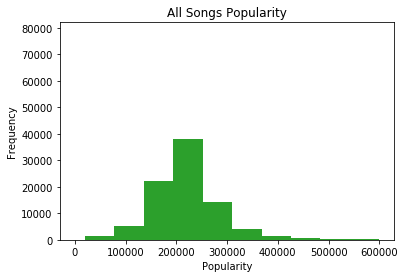

In [17]:
plot_hist(features_list_cap)
len(features_list_cap)

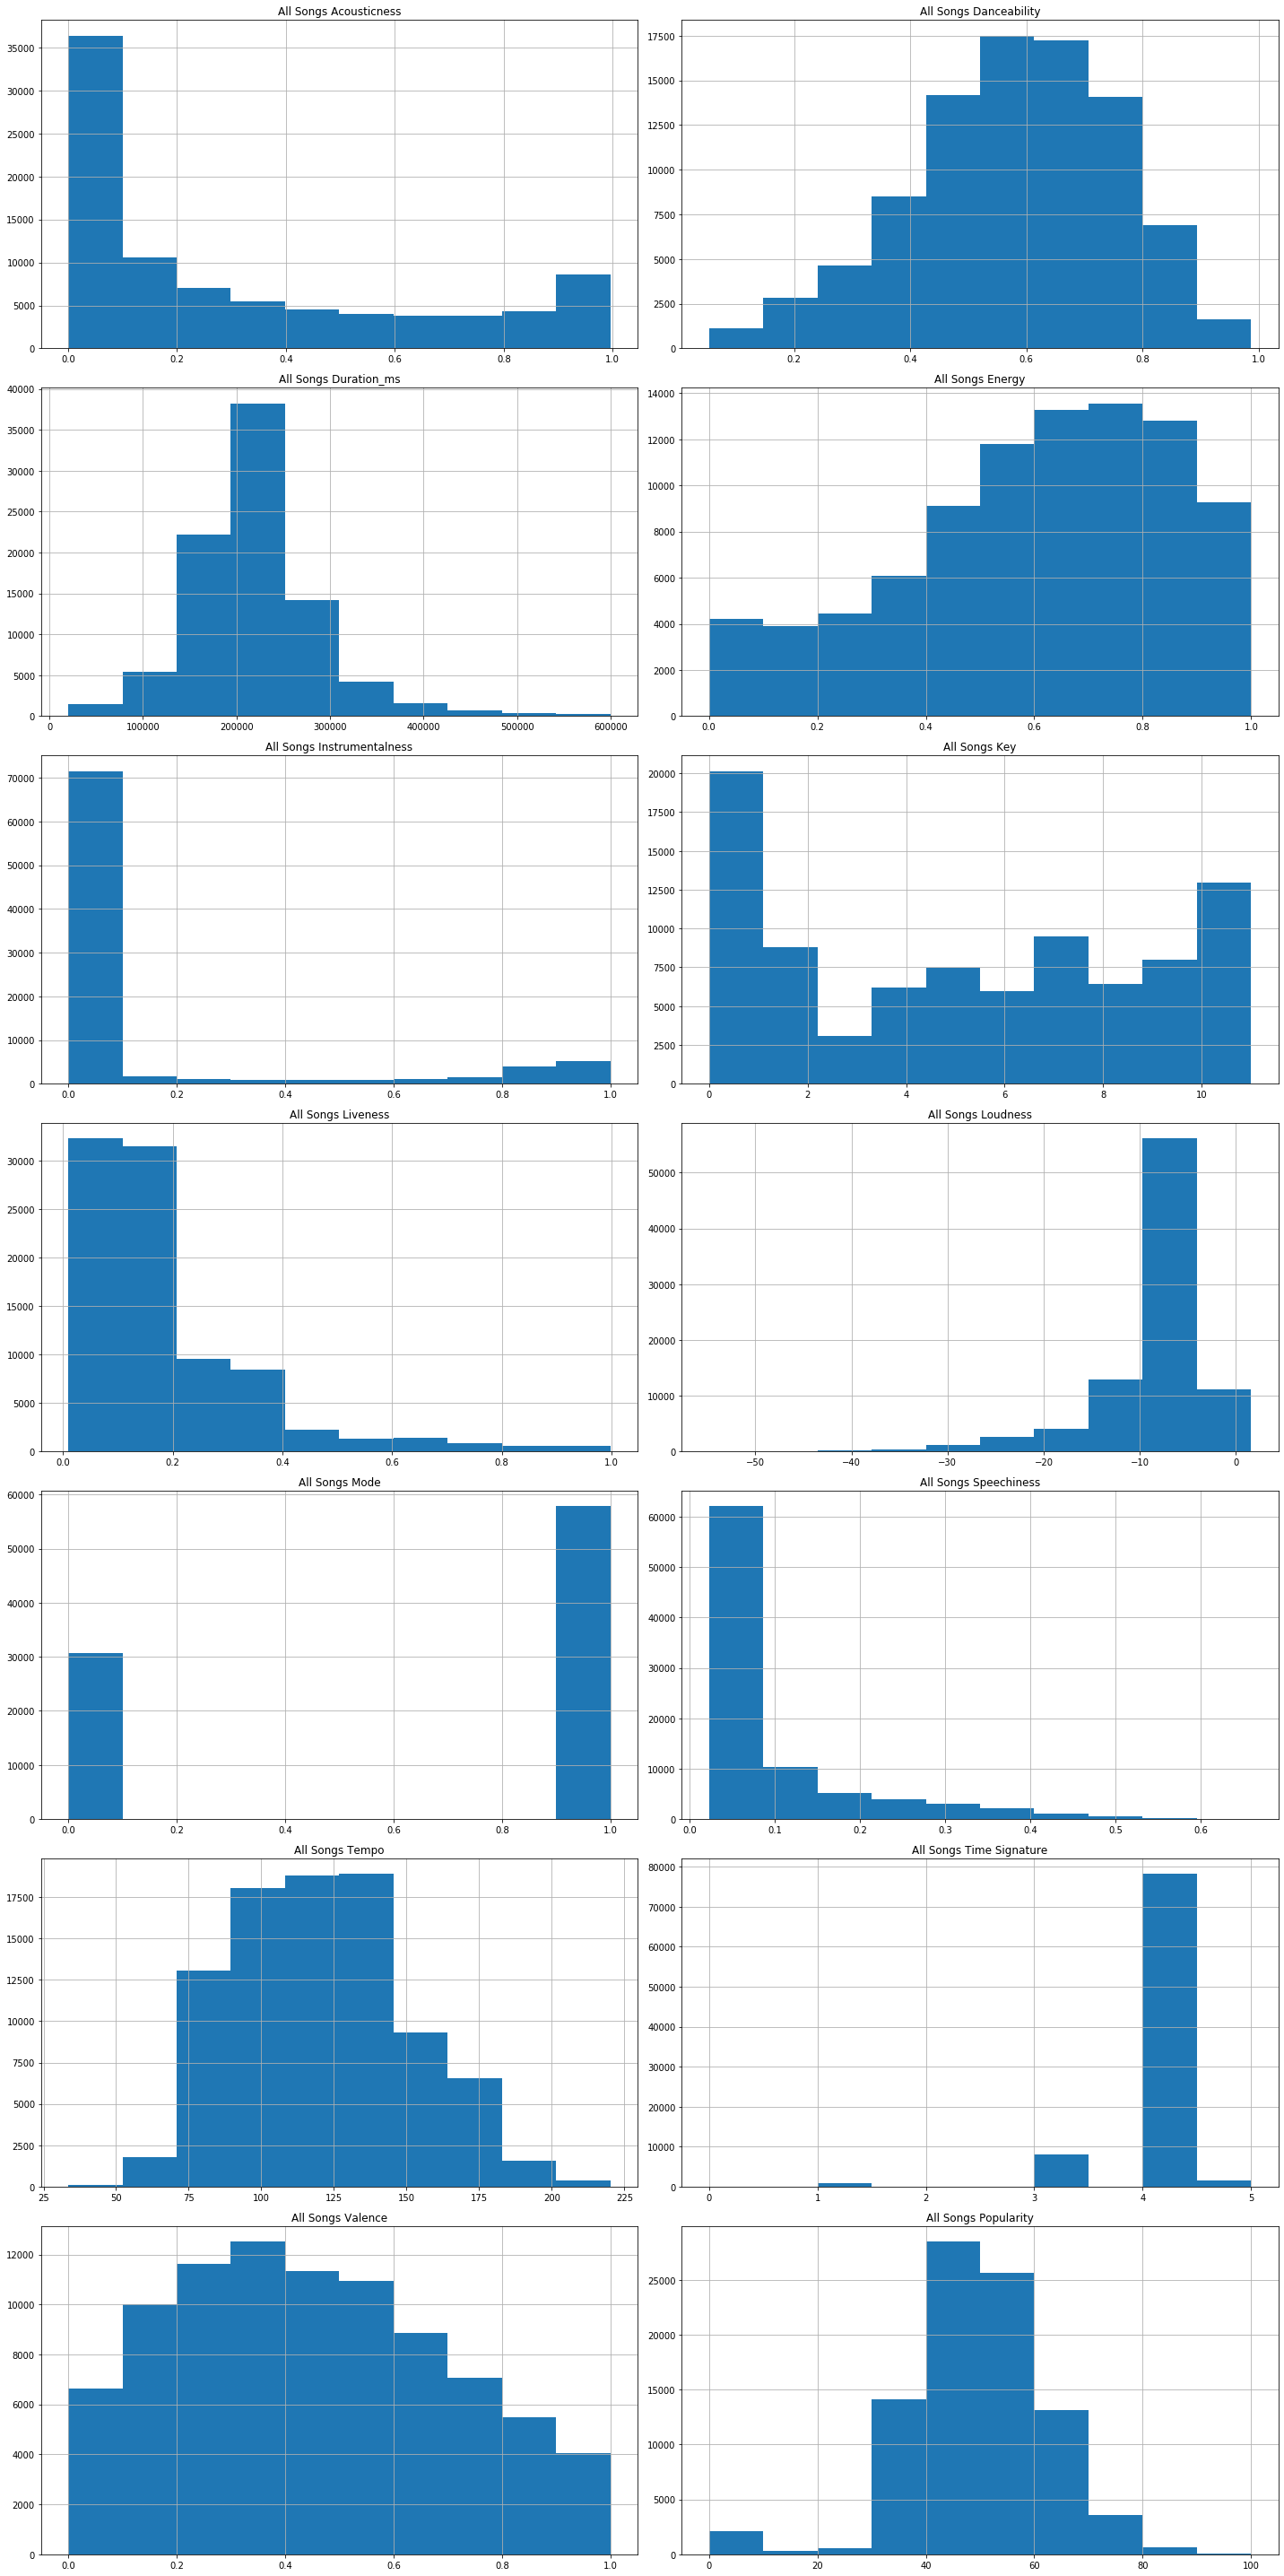

In [18]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(20,40))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title('All Songs ' + var_name)
    fig.tight_layout()
    plt.show()

draw_histograms(new_result, features_list_cap, 7, 2)

In [19]:
# songs under 10 minutes, 600000 ms
# Sounds Of Nature Thunderstorm, Rain and Thunderstorm By the Sea (Sounds of Nature: 3x23 Min Long Recordings In 1 Track)
# Wolfgang Amadeus Mozart Piano Concerto No.27 in B flat, K.595: 1. Allegro
above = new_result[new_result['Duration_ms']<600000]
above

,Artist,Track Name,Track ID,Popularity,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
0,John Lennon,Happy Xmas (War Is Over) - Remastered,3zJw3rugfpVrmBeDDnUYzy,85,0.319000,0.328,213880.0,0.607,0.000000,2.0,0.7650,-11.076,1.0,0.0315,146.539,3.0,0.395
1,Bruno Mars,Just the Way You Are,7BqBn9nzAq8spo5e7cZ0dJ,81,0.015100,0.637,220733.0,0.843,0.000000,5.0,0.0876,-5.413,1.0,0.0432,109.012,4.0,0.434
2,Train,"Hey, Soul Sister",4HlFJV71xXKIGcU3kRyttv,83,0.185000,0.673,216773.0,0.886,0.000000,1.0,0.0826,-4.440,0.0,0.0431,97.012,4.0,0.795
3,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),03tqyYWC9Um2ZqU0ZN849H,75,0.005440,0.760,263773.0,0.595,0.000000,1.0,0.2410,-6.366,1.0,0.0391,131.497,4.0,0.361
4,Kanye West,POWER,2gZUPNdnz5Y45eiGxpHGSc,79,0.016200,0.543,292093.0,0.915,0.000000,0.0,0.7440,-4.746,0.0,0.1130,153.998,4.0,0.577
5,Jason Aldean,Dirt Road Anthem,2qYsSHsYkihWx043HVJQRV,73,0.347000,0.680,229400.0,0.741,0.000002,2.0,0.1170,-5.055,1.0,0.0357,127.024,4.0,0.635
6,Eminem,Love The Way You Lie,15JINEqzVMv3SvJTAXAKED,82,0.241000,0.749,263373.0,0.925,0.000000,10.0,0.5200,-5.034,1.0,0.2270,86.989,4.0,0.641
7,Kesha,TiK ToK,0HPD5WQqrq7wPWR7P7Dw1i,80,0.099100,0.755,199693.0,0.837,0.000000,2.0,0.2890,-2.718,0.0,0.1420,120.028,4.0,0.714
8,Miguel,Sure Thing,0JXXNGljqupsJaZsgSbMZV,75,0.027500,0.684,195373.0,0.603,0.000311,11.0,0.1910,-8.127,0.0,0.0989,81.000,4.0,0.504
9,Bruno Mars,Grenade,2tJulUYLDKOg9XrtVkMgcJ,75,0.146000,0.706,223253.0,0.558,0.000000,2.0,0.1180,-7.237,0.0,0.0593,110.443,4.0,0.227


In [20]:
# Aziz Ansari Sheets (comedy skit)
speechiness = above[above['Speechiness']<0.66]

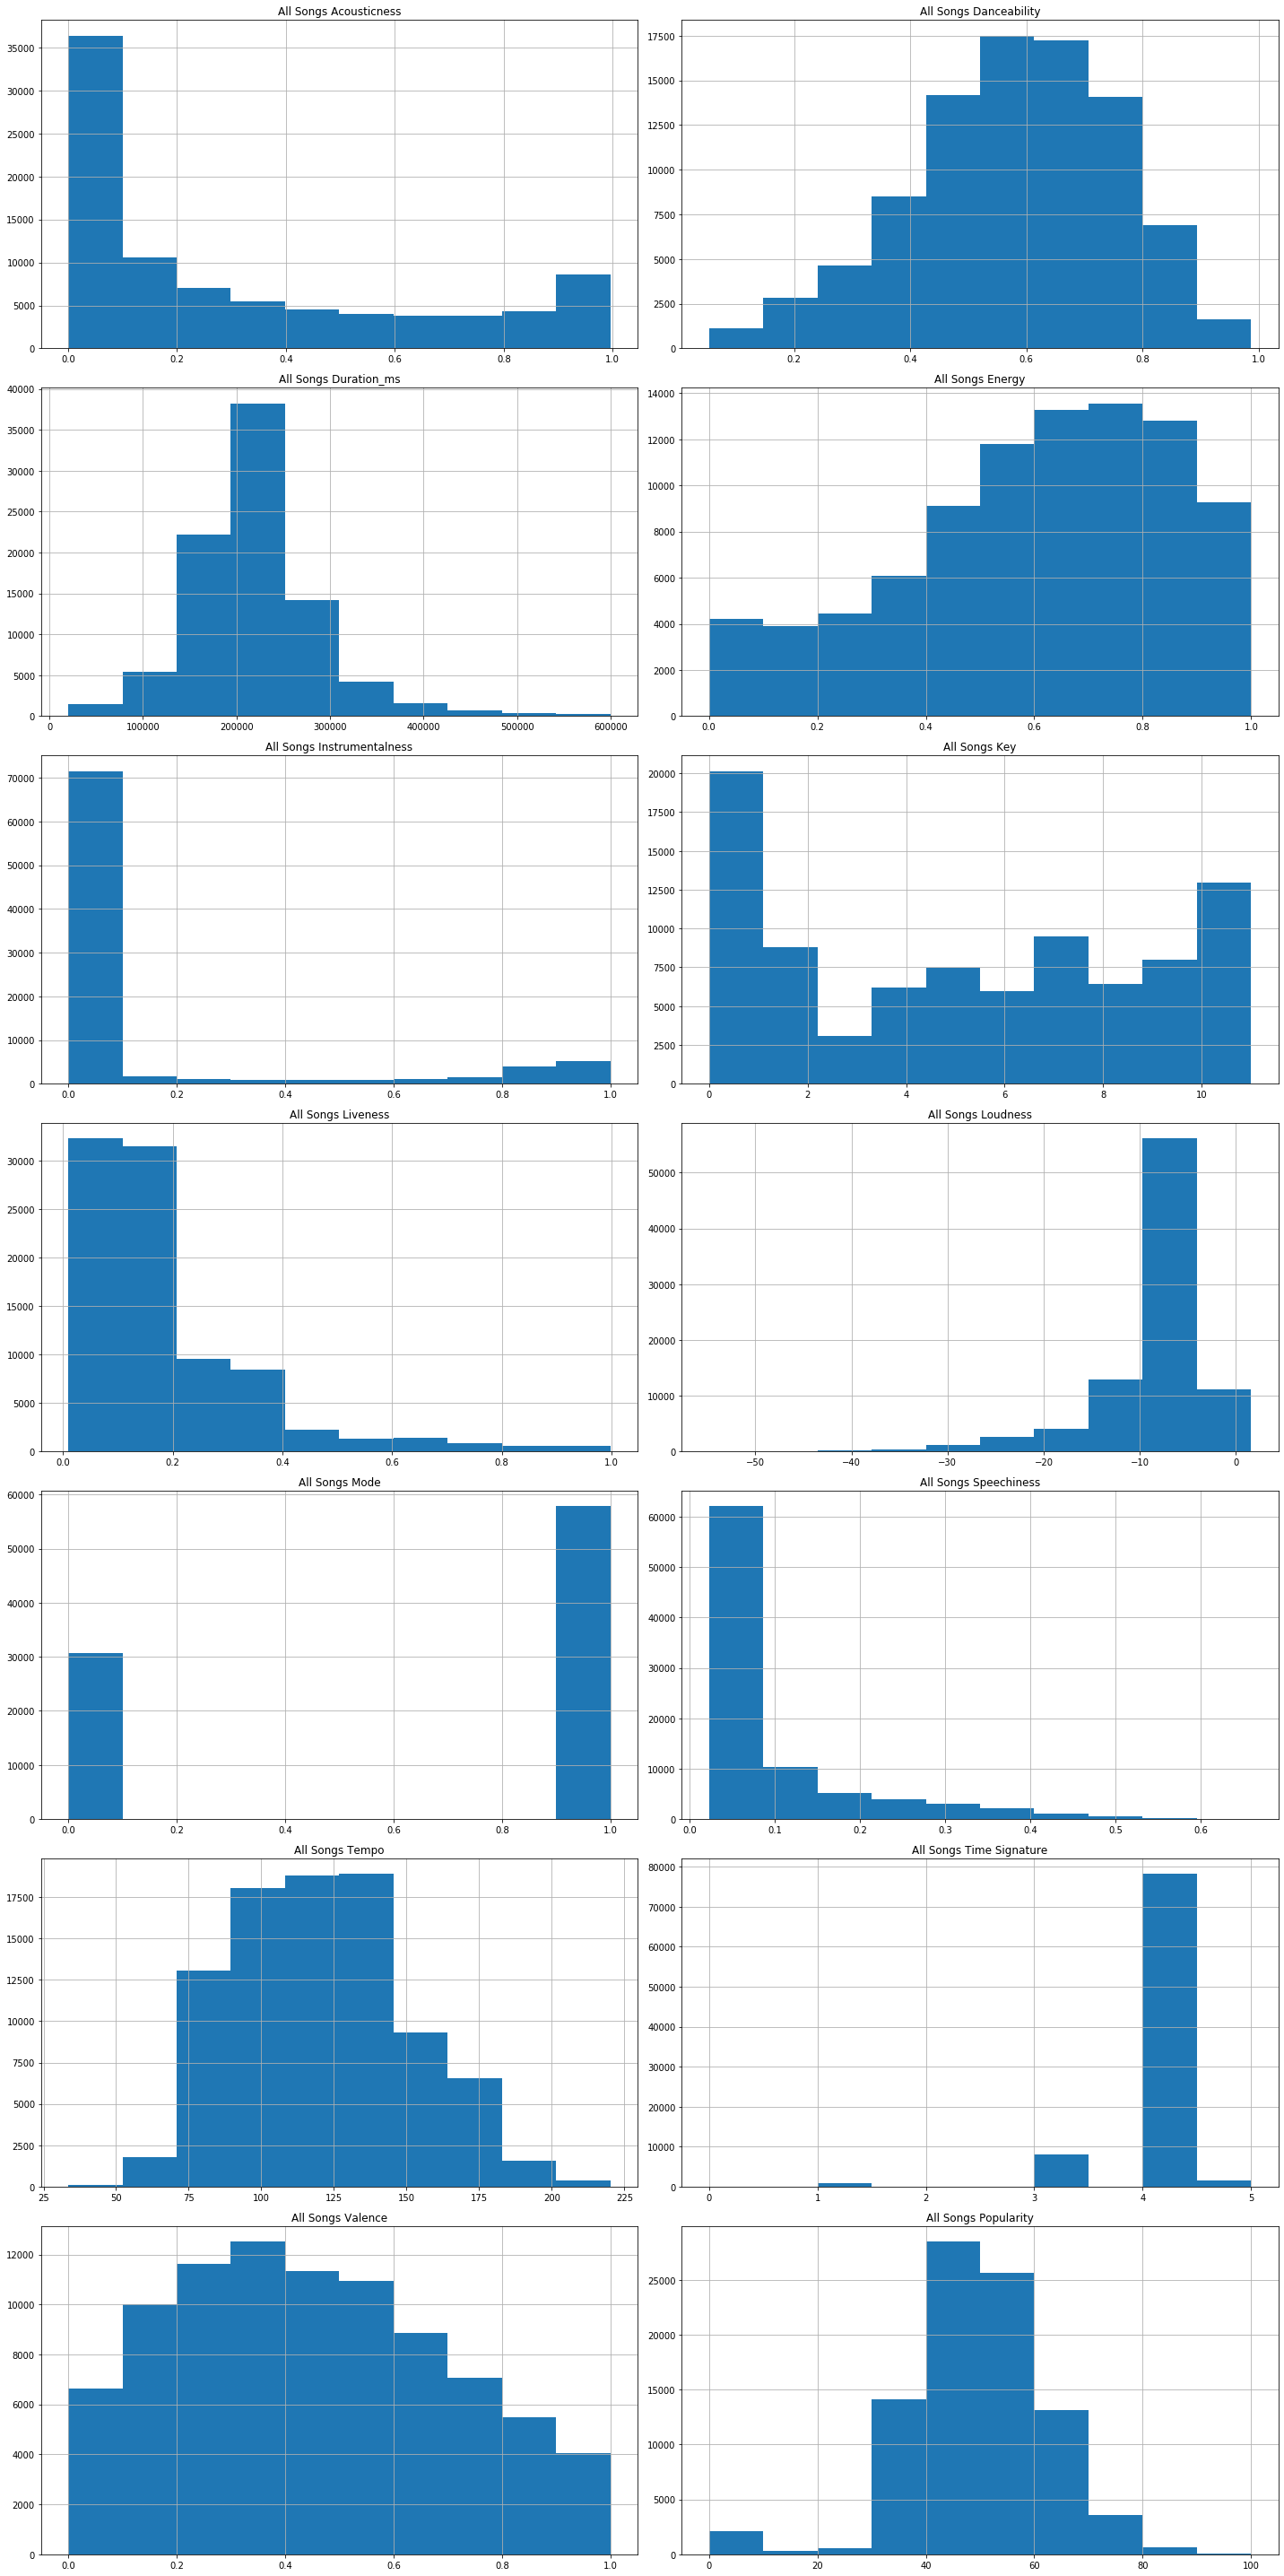

In [21]:
speechiness
# histograms of the new data
draw_histograms(speechiness, features_list_cap, 7, 2)

In [22]:
speechiness.to_csv("data/songs_all_decade_clean.csv", index=False)

In [23]:
# Maroon 5 Happy Christmas (War Is Over), and other christmas songs under
pop = speechiness[speechiness['Popularity']<0.1]
pop

,Artist,Track Name,Track ID,Popularity,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
80113,J Balvin,Solitario,37ygBughigkXoKebp10eu0,0,0.08920,0.784,207720.0,0.812,0.011200,1.0,0.1060,-4.499,1.0,0.0588,100.006,4.0,0.7040
80192,Ariana Grande,Last Christmas,5lqdLN4ksP1GBbd7vIGhuf,0,0.11500,0.672,203653.0,0.776,0.000000,7.0,0.1050,-2.937,1.0,0.0269,102.977,4.0,0.7860
80297,Justin Bieber,Fa La La,3AGv9eiBQXtD5KLuBCPACc,0,0.02070,0.657,185560.0,0.679,0.000003,10.0,0.1980,-8.606,0.0,0.0361,94.493,4.0,0.4160
80298,Justin Bieber,Christmas Love,5700xg3MfMM59saNAUgBgp,0,0.51800,0.633,206787.0,0.512,0.000000,10.0,0.3280,-8.577,1.0,0.0294,99.944,4.0,0.3760
80299,Justin Bieber,Mistletoe,5FwSSLyMsTbqGXVntpBptw,0,0.49800,0.658,182947.0,0.560,0.000000,6.0,0.0794,-9.049,0.0,0.0467,161.994,4.0,0.8540
80301,Justin Bieber,Mistletoe,5e5z8xWfsj3YzAe5ATl0E7,0,0.48500,0.673,182947.0,0.540,0.000000,6.0,0.0851,-9.228,0.0,0.0461,161.975,4.0,0.8410
80303,Justin Bieber,Fa La La,6UYLDJKmLe3ZzXallSGsQT,0,0.02070,0.657,185560.0,0.679,0.000003,10.0,0.1980,-8.606,0.0,0.0361,94.493,4.0,0.4160
80304,Justin Bieber,Mistletoe,7HOqtArZjFeo2KuvhAOAsp,0,0.48000,0.655,183667.0,0.550,0.000000,6.0,0.0931,-9.094,0.0,0.0460,161.976,4.0,0.8540
80312,Taylor Swift,Christmas Tree Farm,2mvabkN1i2gLnGAPUVdwek,0,0.06400,0.597,228027.0,0.698,0.000000,0.0,0.3280,-4.452,1.0,0.0401,133.995,4.0,0.4610
80365,Maroon 5,Happy Christmas (War Is Over),6nEe3mZzgHuWb4afinyZOZ,0,0.93300,0.436,207080.0,0.150,0.000000,2.0,0.1030,-10.784,1.0,0.0307,143.072,3.0,0.1680


In [24]:
useme = pd.read_csv("data/songs_all_decade_clean.csv")

In [25]:
useme.describe()

,Popularity,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
count,88554.000000,88554.000000,88554.000000,88554.000000,88554.000000,88554.000000,88554.000000,88554.000000,88554.000000,88554.000000,88554.000000,88554.000000,88554.000000,88554.000000
mean,49.006708,0.311873,0.577886,220548.322538,0.600973,0.135175,5.203255,0.189423,-8.324528,0.652991,0.095061,120.630076,3.896662,0.449532
std,13.237356,0.330381,0.176493,68945.507097,0.249771,0.297049,3.589677,0.156954,5.528754,0.476021,0.098324,30.252905,0.431127,0.249264
min,0.000000,0.000000,0.053200,20139.000000,0.000020,0.000000,0.000000,0.009360,-54.837000,0.000000,0.022400,33.506000,0.000000,0.000000
25%,41.000000,0.026600,0.465000,182866.250000,0.444000,0.000000,2.000000,0.097600,-9.510000,0.000000,0.036400,96.032000,4.000000,0.247000
50%,49.000000,0.170000,0.590000,214293.000000,0.638000,0.000010,5.000000,0.124000,-6.737000,1.000000,0.051300,120.014000,4.000000,0.429000
75%,57.000000,0.557000,0.709000,249997.750000,0.800000,0.011300,8.000000,0.231000,-4.987000,1.000000,0.105000,140.052000,4.000000,0.637000
max,100.000000,0.996000,0.987000,599746.000000,1.000000,1.000000,11.000000,0.998000,1.593000,1.000000,0.659000,220.169000,5.000000,1.000000


In [26]:
import random
useme
random.seed(112358)

In [27]:
pop_median = useme.median()[0]
useme['top_hit'] = (useme['Popularity'] > pop_median) * 1

In [28]:
X_train, X_test, y_train, y_test = train_test_split(useme.loc[:, useme.columns != 'top_hit'], 
                                                    useme.top_hit, test_size = 0.2, 
                                                    random_state = 100, 
                                                    stratify = useme.top_hit)

In [29]:
X_train = X_train.drop(columns=['Popularity'])
X_test = X_test.drop(columns=['Popularity'])

In [30]:
X_train_features = X_train.iloc[:, 3:17].head()
X_test_features = X_test.iloc[:, 3:17].head()

In [31]:
features = X_train_features.columns.to_list()

scaler = MinMaxScaler().fit(X_train_features)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_features), columns = features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_features), columns = features)

In [32]:
# after splitting into train and test and scaling the data
pca_decomposition = PCA().fit(X_train_scaled)
x_train_pca = pca_decomposition.transform(X_train_scaled)
x_test_pca =  pca_decomposition.transform(X_test_scaled)

print(x_train_pca.shape)
print(x_test_pca.shape)

(5, 5)
(5, 5)


In [33]:
variance_explained = pca_decomposition.explained_variance_ratio_
print('Variance explained by each PCA component:', variance_explained[0:2])
print('Total variance explained:', np.sum(variance_explained[0:2]))

Variance explained by each PCA component: [0.40092956 0.3332415 ]
Total variance explained: 0.7341710558416521


In [34]:
count = 0
cumsum = []
for i in range(len(variance_explained)):
    if(np.sum(variance_explained[0:i]) < .90):
        count += 1
        cumsum.append(np.sum(variance_explained[0:i]))

print('Number of PCA components needed to explain 90% of the variability in the predictors:', count)

Number of PCA components needed to explain 90% of the variability in the predictors: 3


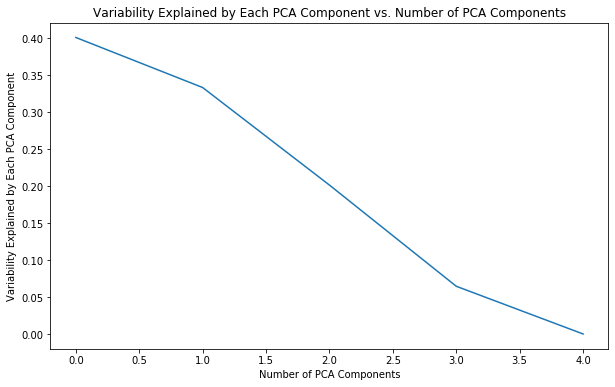

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))

x_range = list(range(len(variance_explained)))

plt.plot(x_range, variance_explained)
plt.title('Variability Explained by Each PCA Component vs. Number of PCA Components')
plt.ylabel('Variability Explained by Each PCA Component')
plt.xlabel('Number of PCA Components')
plt.show()

In [36]:
x_train_pca

array([[-1.44559996e-01,  3.99959318e-01, -1.17177458e-01,
         5.91393770e-01, -3.07304152e-17],
       [-3.21519565e-01, -1.02796265e+00, -7.06015498e-01,
        -8.71138549e-02,  2.73927110e-15],
       [ 1.50307919e+00, -1.27146622e-01,  2.25993828e-01,
        -7.41151219e-02, -1.59541703e-15],
       [-2.98291684e-01,  1.08137407e+00, -3.23484532e-01,
        -3.38048783e-01,  6.57602927e-16],
       [-7.38707947e-01, -3.26224115e-01,  9.20683659e-01,
        -9.21160102e-02, -1.26012990e-15]])

In [37]:
def get_playlist_tracks(username,playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [38]:
# spotify get new music friday
# spotify:playlist:37i9dQZF1DX873GaRGUmPl
newmusicfriday = get_playlist_tracks('spotify', '37i9dQZF1DX4JAvHpjipBk')